In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import csv
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import cross_val_score

In [2]:
train_data = pd.read_csv("assignment_train.csv")
train_data.head(10)

,Unnamed: 0,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
0,26468,48,Private,123075,Assoc-voc,11,Married-civ-spouse,Tech-support,Husband,White,Male,0,0,40,United-States,>50K
1,47137,35,Private,184685,Some-college,10,Never-married,Adm-clerical,Other-relative,Black,Female,0,0,40,United-States,<=50K.
2,21282,65,Private,105252,HS-grad,9,Married-civ-spouse,Tech-support,Husband,White,Male,0,0,40,United-States,>50K
3,46100,45,Private,175990,HS-grad,9,Divorced,Exec-managerial,Unmarried,White,Female,0,0,38,United-States,<=50K.
4,15420,57,Self-emp-inc,106103,Some-college,10,Married-civ-spouse,Tech-support,Husband,White,Male,0,0,60,United-States,>50K
5,17188,61,Private,191188,10th,6,Widowed,Farming-fishing,Unmarried,White,Male,0,0,20,United-States,<=50K
6,15130,47,?,178013,10th,6,Married-civ-spouse,?,Wife,White,Female,0,0,20,Cuba,<=50K
7,8725,48,Local-gov,334409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,White,Female,0,0,50,United-States,>50K
8,40001,25,State-gov,31350,Some-college,10,Never-married,Other-service,Not-in-family,White,Male,0,0,40,United-States,<=50K.
9,28422,39,Private,112731,HS-grad,9,Divorced,Other-service,Not-in-family,Other,Female,0,0,40,Dominican-Republic,<=50K


In [3]:
train_data = train_data.drop(['Unnamed: 0'],axis=1)

In [4]:
print("The data size :",train_data.shape)

The data size : (41516, 15)


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41516 entries, 0 to 41515
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             41516 non-null  int64 
 1   workclass       41516 non-null  object
 2   fnlwgt          41516 non-null  int64 
 3   education       41516 non-null  object
 4   education-num   41516 non-null  int64 
 5   marital-status  41516 non-null  object
 6   occupation      41516 non-null  object
 7   relationship    41516 non-null  object
 8   race            41516 non-null  object
 9   sex             41516 non-null  object
 10  capital-gain    41516 non-null  int64 
 11  capital-loss    41516 non-null  int64 
 12  hours-per-week  41516 non-null  int64 
 13  native-country  41516 non-null  object
 14  Income          41516 non-null  object
dtypes: int64(6), object(9)
memory usage: 4.8+ MB


In [6]:
train_data['Income'].value_counts()

 <=50K     21053
 <=50K.    10535
 >50K       6663
 >50K.      3265
Name: Income, dtype: int64

In [7]:
train_data.columns = train_data.columns.str.replace(' ', '')
train_data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'Income'],
      dtype='object')

In [8]:
train_data['Income'].value_counts()

 <=50K     21053
 <=50K.    10535
 >50K       6663
 >50K.      3265
Name: Income, dtype: int64

In [9]:
train_data.replace(' ?', np.nan, inplace=True)

In [10]:
train_data.isnull().sum()

age                  0
workclass         2404
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        2413
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     725
Income               0
dtype: int64

In [11]:
train_data['Income'] = train_data['Income'].str.replace('.', '')
train_data['Income'].value_counts()



 <=50K    31588
 >50K      9928
Name: Income, dtype: int64

In [12]:
train_data['Income'] = train_data['Income'].apply(lambda x: 1 if x==' >50K' else 0)

In [13]:
train_data['Income'].value_counts()

0    31588
1     9928
Name: Income, dtype: int64

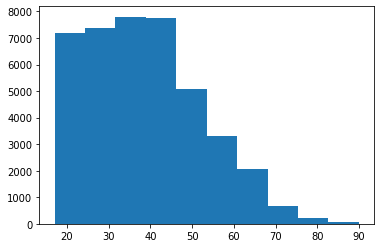

In [14]:
plt.hist(train_data['age']);

In [15]:
for col in ['workclass', 'occupation', 'native-country']:
    train_data[col].fillna(train_data[col].mode()[0], inplace=True)
train_data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
Income            0
dtype: int64

In [16]:
def get_relation(feature1,feature2):

  sns.factorplot(x=feature1, y=feature2, data=train_data, kind="bar", size = 8, palette = "muted")
  plt.xticks(rotation=45);

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3710: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


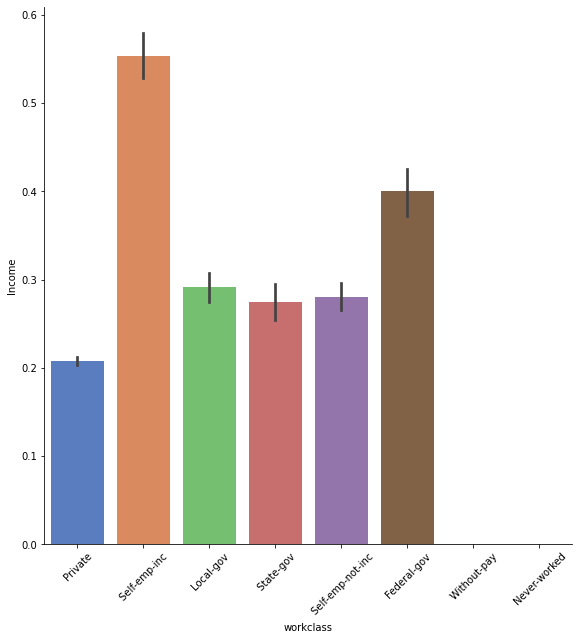

In [17]:
get_relation("workclass","Income")

In [18]:
train_data['workclass'].replace(' Without-pay', ' Never-worked', inplace=True)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3710: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


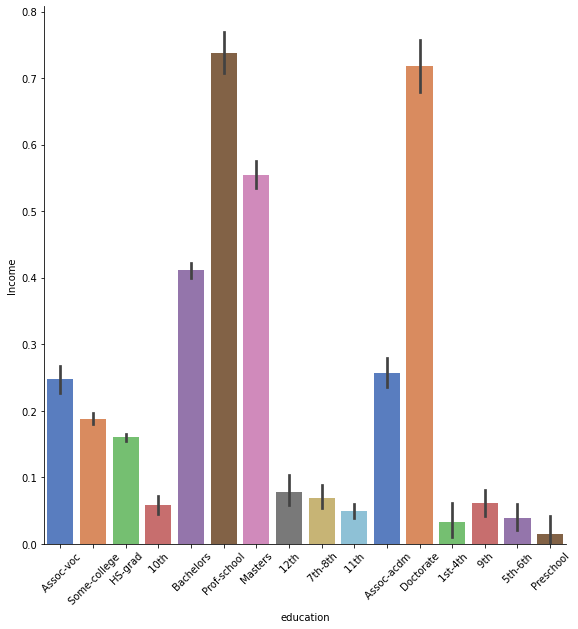

In [19]:
get_relation("education","Income")

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3710: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


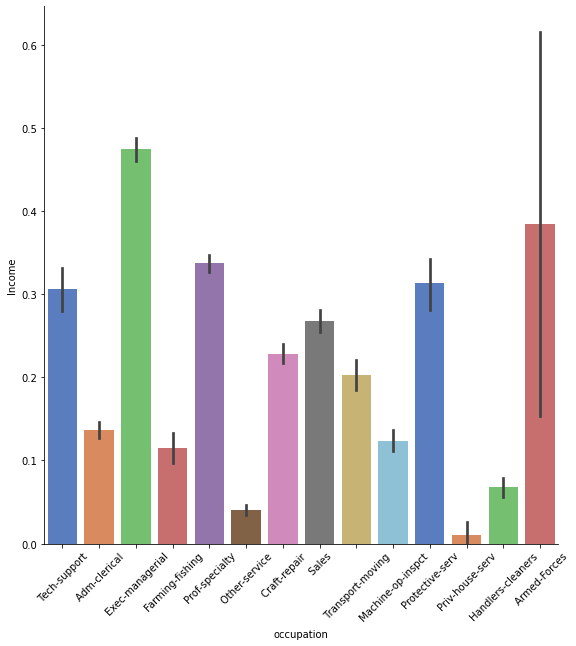

In [20]:
get_relation("occupation","Income")

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3710: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


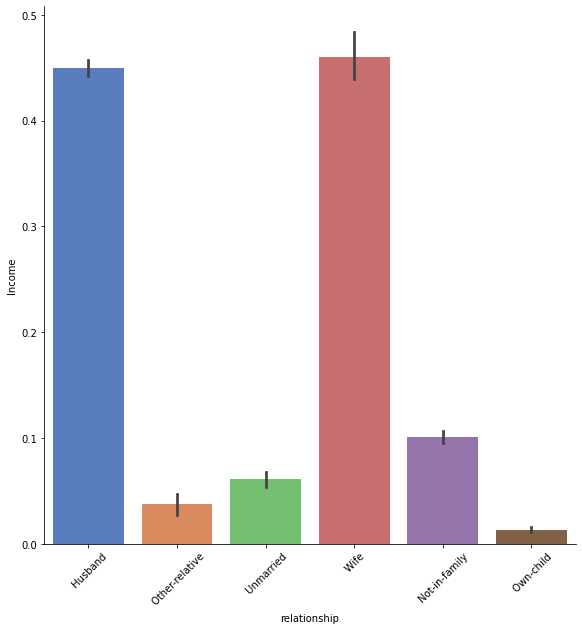

In [21]:
get_relation("relationship","Income")

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3710: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


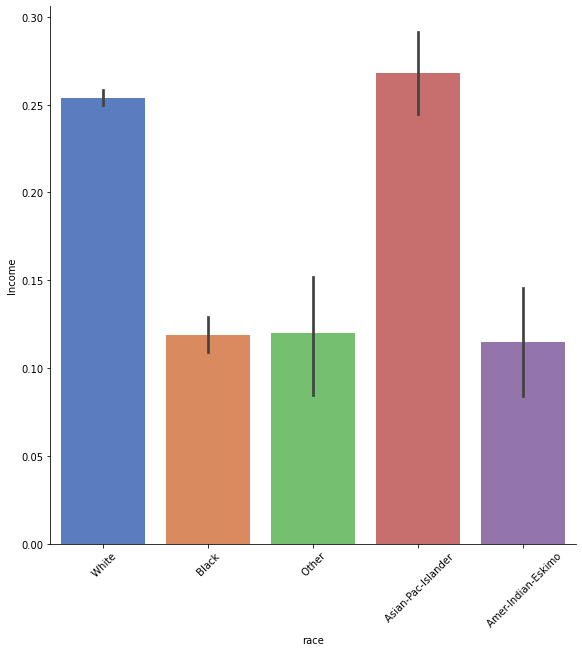

In [22]:
get_relation("race","Income")

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3710: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


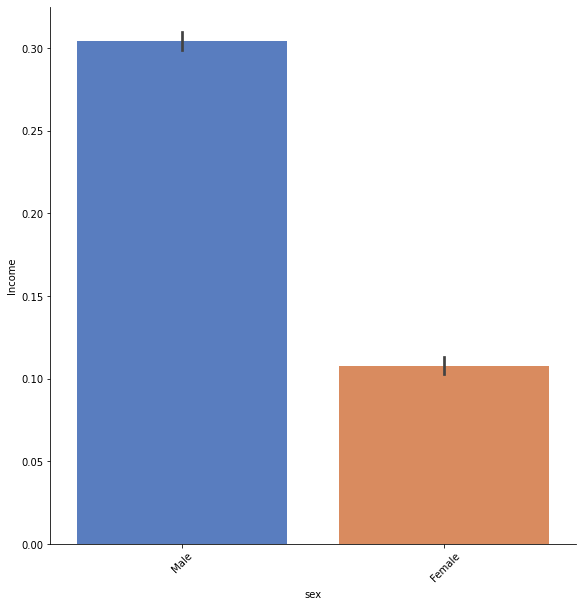

In [23]:
get_relation("sex","Income")

In [24]:
from sklearn.preprocessing import LabelEncoder

categorical_features = list(train_data.select_dtypes(include=['object']).columns)
label_encoder_feat = {}
for i, feature in enumerate(categorical_features):
    label_encoder_feat[feature] = LabelEncoder()
    train_data[feature] = label_encoder_feat[feature].fit_transform(train_data[feature])

train_data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
0,48,3,123075,8,11,2,12,0,4,1,0,0,40,38,1
1,35,3,184685,15,10,4,0,2,2,0,0,0,40,38,0
2,65,3,105252,11,9,2,12,0,4,1,0,0,40,38,1
3,45,3,175990,11,9,0,3,4,4,0,0,0,38,38,0
4,57,4,106103,15,10,2,12,0,4,1,0,0,60,38,1


In [25]:
from sklearn.model_selection import train_test_split
features = train_data.drop(columns = ['Income','education-num'])
target = train_data['Income']
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.3,random_state = 0)

print ("Train data set size : ", X_train.shape)
print ("Test data set size : ", X_test.shape)

Train data set size :  (29061, 13)
Test data set size :  (12455, 13)


In [26]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

logistic = LogisticRegression(C = 0.5, max_iter = 500)
model_1 = logistic.fit(X_train, y_train)

# Predictions
pred_1 = model_1.predict(X_test)

print ("The accuracy of model 1 : ",accuracy_score(y_test, pred_1))
print ("The f1 score of model 1 : ", f1_score(y_test, pred_1, average = 'binary'))

The accuracy of model 1 :  0.7919710959454035
The f1 score of model 1 :  0.39306629187163267


In [27]:
print("Classification Report of Logistic Regression :")
print (classification_report(y_test, pred_1, target_names = ["<=50K", ">50K"]))

Classification Report of Logistic Regression :
              precision    recall  f1-score   support

       <=50K       0.81      0.95      0.87      9510
        >50K       0.63      0.28      0.39      2945

    accuracy                           0.79     12455
   macro avg       0.72      0.62      0.63     12455
weighted avg       0.77      0.79      0.76     12455



In [28]:
accuracy=metrics.accuracy_score(y_test,pred_1)
print("Accuracy score :",accuracy)

Accuracy score : 0.7919710959454035


In [29]:
R_forest = RandomForestClassifier(n_estimators = 200)
model_2 = R_forest.fit(X_train, y_train)

# Predictions
pred_2 = model_2.predict(X_test)

print ("The accuracy of model 2 : ",accuracy_score(y_test, pred_2))
print ("The f1 score of model 2 : ", f1_score(y_test, pred_2, average = 'binary'))

The accuracy of model 2 :  0.8557205941389
The f1 score of model 2 :  0.6672838363266063


In [30]:
print("Classification Report of Random Forest Classifier :")
print (classification_report(y_test, pred_2, target_names = ["<=50K", ">50K"]))

Classification Report of Random Forest Classifier :
              precision    recall  f1-score   support

       <=50K       0.89      0.93      0.91      9510
        >50K       0.73      0.61      0.67      2945

    accuracy                           0.86     12455
   macro avg       0.81      0.77      0.79     12455
weighted avg       0.85      0.86      0.85     12455



In [31]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

knn=KNeighborsClassifier()
k_range=list(range(1,10))
weight_option=['uniform','distance']
k_grid = dict(n_neighbors=k_range, weights = weight_option)
grid = GridSearchCV(knn, k_grid, cv=10, scoring = 'precision')
grid.fit(X_train,y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='precision', verbose=0)

In [32]:
print("Best Scores :",str(grid.best_score_))
print("Best Param :",str(grid.best_params_))
print("Best Estimators :",str(grid.best_estimator_))

Best Scores : 0.721386281837109
Best Param : {'n_neighbors': 8, 'weights': 'uniform'}
Best Estimators : KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=8, p=2,
                     weights='uniform')


In [33]:
predict_=grid.predict(X_test)

In [34]:
print(predict_)

[0 0 0 ... 0 0 0]


In [35]:
accuracy=metrics.accuracy_score(y_test,predict_)
print("Accuracy score :",accuracy)

Accuracy score : 0.7946206342834203


In [36]:
get_stuff=precision_recall_fscore_support(y_test,predict_,average='weighted')
print("Precision :",str(get_stuff[0]))
print("Recall :",str(get_stuff[1]))
print("fbeta_score :",str(get_stuff[2]))

Precision : 0.7783466906502826
Recall : 0.7946206342834203
fbeta_score : 0.7523716060338154


Decision Tree

In [37]:
from sklearn.tree import DecisionTreeClassifier 

In [38]:
tree=DecisionTreeClassifier()
tree.fit(X_train,y_train)
print("Test score ",tree.score(X_test,y_test))
print("Train score ",tree.score(X_train,y_train))

Test score  0.8089923725411481
Train score  1.0


In [39]:
pred_4 = tree.predict(X_test)
accuracy=metrics.accuracy_score(y_test,predict_)
print("Accuracy score of Decision Tree :",accuracy)


Accuracy score of Decision Tree : 0.7946206342834203


In [40]:
get_stuff=precision_recall_fscore_support(y_test,pred_4,average='weighted')
print("Precision :",str(get_stuff[0]))
print("Recall :",str(get_stuff[1]))
print("fbeta_score :",str(get_stuff[2]))

Precision : 0.8131332840591969
Recall : 0.8089923725411481
fbeta_score : 0.8108815155739233


In [41]:
test_data = pd.read_csv("assignment_test.csv")
test_data.head(10)

,Unnamed: 0,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income_knn,Income_lr,Income_dt,Income_rf
0,8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,NaN,NaN,NaN,NaN
1,9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,NaN,NaN,NaN,NaN
2,15,34,Private,245487,7th-8th,4,Married-civ-spouse,Transport-moving,Husband,Amer-Indian-Eskimo,Male,0,0,45,Mexico,NaN,NaN,NaN,NaN
3,30,23,Local-gov,190709,Assoc-acdm,12,Never-married,Protective-serv,Not-in-family,White,Male,0,0,52,United-States,NaN,NaN,NaN,NaN
4,34,22,State-gov,311512,Some-college,10,Married-civ-spouse,Other-service,Husband,Black,Male,0,0,15,United-States,NaN,NaN,NaN,NaN
5,41,53,Self-emp-not-inc,88506,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,NaN,NaN,NaN,NaN
6,42,24,Private,172987,Bachelors,13,Married-civ-spouse,Tech-support,Husband,White,Male,0,0,50,United-States,NaN,NaN,NaN,NaN
7,51,18,Private,226956,HS-grad,9,Never-married,Other-service,Own-child,White,Female,0,0,30,?,NaN,NaN,NaN,NaN
8,52,47,Private,51835,Prof-school,15,Married-civ-spouse,Prof-specialty,Wife,White,Female,0,1902,60,Honduras,NaN,NaN,NaN,NaN
9,54,47,Self-emp-inc,109832,HS-grad,9,Divorced,Exec-managerial,Not-in-family,White,Male,0,0,60,United-States,NaN,NaN,NaN,NaN


In [42]:
test_data = test_data.drop(['Unnamed: 0'],axis=1)
print("The data size :",test_data.shape)

The data size : (7326, 18)


In [43]:
test_data.columns = test_data.columns.str.replace(' ', '')
test_data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'Income_knn', 'Income_lr', 'Income_dt', 'Income_rf'],
      dtype='object')

In [44]:
test_data.replace(' ?', np.nan, inplace=True)

In [45]:
test_data.isnull().sum()

age                  0
workclass          395
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation         396
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     132
Income_knn        7326
Income_lr         7326
Income_dt         7326
Income_rf         7326
dtype: int64

In [46]:
for col in ['workclass', 'occupation', 'native-country']:
    test_data[col].fillna(test_data[col].mode()[0], inplace=True)
test_data.isnull().sum()

age                  0
workclass            0
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation           0
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country       0
Income_knn        7326
Income_lr         7326
Income_dt         7326
Income_rf         7326
dtype: int64

In [47]:
df = test_data.drop(['Income_knn','Income_dt','Income_rf','Income_lr'],axis=1)
df.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States
1,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States
2,34,Private,245487,7th-8th,4,Married-civ-spouse,Transport-moving,Husband,Amer-Indian-Eskimo,Male,0,0,45,Mexico
3,23,Local-gov,190709,Assoc-acdm,12,Never-married,Protective-serv,Not-in-family,White,Male,0,0,52,United-States
4,22,State-gov,311512,Some-college,10,Married-civ-spouse,Other-service,Husband,Black,Male,0,0,15,United-States
5,53,Self-emp-not-inc,88506,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States
6,24,Private,172987,Bachelors,13,Married-civ-spouse,Tech-support,Husband,White,Male,0,0,50,United-States
7,18,Private,226956,HS-grad,9,Never-married,Other-service,Own-child,White,Female,0,0,30,United-States
8,47,Private,51835,Prof-school,15,Married-civ-spouse,Prof-specialty,Wife,White,Female,0,1902,60,Honduras
9,47,Self-emp-inc,109832,HS-grad,9,Divorced,Exec-managerial,Not-in-family,White,Male,0,0,60,United-States


In [48]:
from sklearn.preprocessing import LabelEncoder

categorical_features = list(df.select_dtypes(include=['object']).columns)
label_encoder_feat = {}
for i, feature in enumerate(categorical_features):
    label_encoder_feat[feature] = LabelEncoder()
    df[feature] = label_encoder_feat[feature].fit_transform(df[feature])

df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,31,3,45781,12,14,4,9,1,4,0,14084,0,50,37
1,42,3,159449,9,13,2,3,0,4,1,5178,0,40,37
2,34,3,245487,5,4,2,13,0,0,1,0,0,45,24
3,23,1,190709,7,12,4,10,1,4,1,0,0,52,37
4,22,6,311512,15,10,2,7,0,2,1,0,0,15,37


In [49]:
df = df.drop(['education-num'],axis=1)
knn_test_predict = grid.predict(df)
print(knn_test_predict)

[1 0 0 ... 0 0 0]


In [50]:
lr_test_predict = model_1.predict(df)
print(lr_test_predict)

[1 1 0 ... 0 0 0]


In [51]:
rf_test_predict = model_2.predict(df)
print(rf_test_predict)

[1 1 0 ... 0 0 0]


In [52]:
dt_test_predict = tree.predict(df)
print(dt_test_predict)

[1 1 0 ... 0 0 0]


In [53]:
Pred_column = ['Income_knn','Income_dt','Income_rf','Income_lr']
predictions = [knn_test_predict,dt_test_predict,rf_test_predict,lr_test_predict]

for i in range(0,len(Pred_column)): 
  test_data[Pred_column[i]]=pd.Series(predictions[i],index=test_data.index)

test_data.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income_knn,Income_lr,Income_dt,Income_rf
0,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,1,1,1,1
1,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,0,1,1,1
2,34,Private,245487,7th-8th,4,Married-civ-spouse,Transport-moving,Husband,Amer-Indian-Eskimo,Male,0,0,45,Mexico,0,0,0,0
3,23,Local-gov,190709,Assoc-acdm,12,Never-married,Protective-serv,Not-in-family,White,Male,0,0,52,United-States,0,0,0,0
4,22,State-gov,311512,Some-college,10,Married-civ-spouse,Other-service,Husband,Black,Male,0,0,15,United-States,0,0,0,0
5,53,Self-emp-not-inc,88506,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,0,0,1,1
6,24,Private,172987,Bachelors,13,Married-civ-spouse,Tech-support,Husband,White,Male,0,0,50,United-States,0,0,0,0
7,18,Private,226956,HS-grad,9,Never-married,Other-service,Own-child,White,Female,0,0,30,United-States,0,0,0,0
8,47,Private,51835,Prof-school,15,Married-civ-spouse,Prof-specialty,Wife,White,Female,0,1902,60,Honduras,0,1,0,1
9,47,Self-emp-inc,109832,HS-grad,9,Divorced,Exec-managerial,Not-in-family,White,Male,0,0,60,United-States,0,0,0,0


In [54]:
test_data.to_csv("Predictions_output.csv", encoding='utf-8')